In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('jobs_in_data.csv')

In [3]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
df.shape

(9355, 12)

In [5]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [6]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [7]:
# Explain our objective 

# The Aim of this Exploratory data analysis is to understand the salary distribution  of people for different job catogories 
# based on various parameters like location,experience level, company size.

# Our objective is to derive meaningful insights that illuminate the factors influencing salary variations among 
# professionals in the data industry.

In [8]:
# We will start with univariate analysis 

In [9]:
df['work_year'].value_counts(normalize = True) * 100

2023    79.668626
2022    17.466595
2021     2.105826
2020     0.758952
Name: work_year, dtype: float64

<AxesSubplot:ylabel='work_year'>

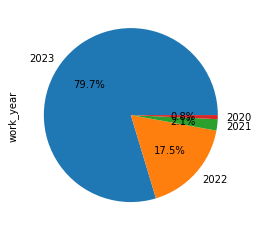

In [10]:
df['work_year'].value_counts().plot(kind = 'pie' , autopct = '%0.1f%%')

In [11]:
# Observation
# 1.We are haveing data for almost 4 years out of which 80% of data is from year 2023 and 17% from year 2022

In [12]:
df['job_title'].value_counts(normalize = True).head(30)*100

Data Engineer                               23.463389
Data Scientist                              21.261358
Data Analyst                                14.836986
Machine Learning Engineer                   10.593266
Applied Scientist                            2.907536
Research Scientist                           2.875468
Analytics Engineer                           2.736505
Data Architect                               2.276857
Business Intelligence Engineer               1.539284
Research Engineer                            1.539284
Data Manager                                 1.411010
ML Engineer                                  1.133084
Data Science Manager                         0.940673
Machine Learning Scientist                   0.812400
Business Intelligence Analyst                0.577231
BI Developer                                 0.555852
Data Science Consultant                      0.470337
Data Specialist                              0.427579
Research Analyst            

In [13]:
df['job_title'].shape

(9355,)

<AxesSubplot:>

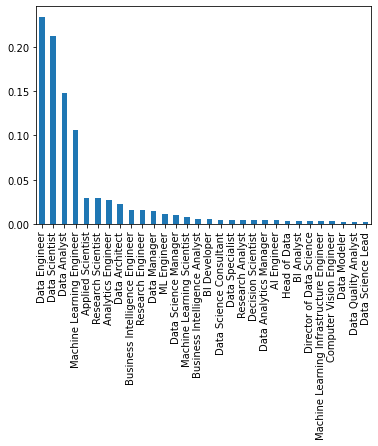

In [14]:
df['job_title'].value_counts(normalize = True).head(30).plot(kind = 'bar')

In [15]:
# Observation

# Majority of people having job title as 'Data Engineer' 'Data Scientist' 'Data Analyst' 'Machine Learning Engineer'              


<AxesSubplot:>

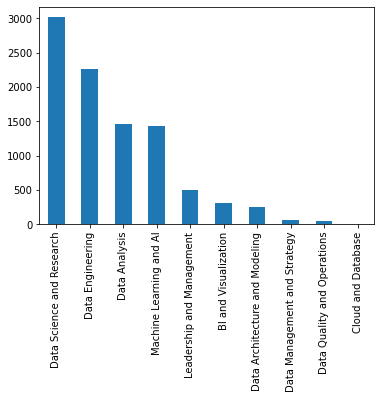

In [16]:
df['job_category'].value_counts().plot(kind = 'bar')

In [17]:
df['job_category'].value_counts(normalize = True) * 100

Data Science and Research         32.218065
Data Engineering                  24.158204
Data Analysis                     15.574559
Machine Learning and AI           15.264564
Leadership and Management          5.376804
BI and Visualization               3.345804
Data Architecture and Modeling     2.768573
Data Management and Strategy       0.652058
Data Quality and Operations        0.587921
Cloud and Database                 0.053447
Name: job_category, dtype: float64

<AxesSubplot:>

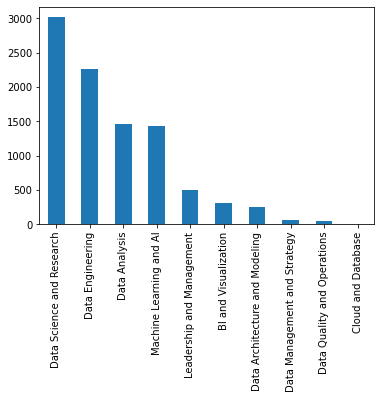

In [18]:
df['job_category'].value_counts().plot(kind = 'bar')

In [19]:
# Observation

# Same majority of people come under Data science,Data engineeering job category

In [20]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [21]:
df['salary_currency'].value_counts(normalize = True) * 100

USD    91.833244
GBP     3.709246
EUR     3.634420
CAD     0.406200
AUD     0.117584
PLN     0.074826
SGD     0.064137
CHF     0.053447
BRL     0.042758
DKK     0.032068
TRY     0.032068
Name: salary_currency, dtype: float64

In [22]:
print(f" Number of entries for Salary USD column = {len(df['salary_in_usd'])}")

print(f" Count of Null values in Salary USD column = {df['salary_in_usd'].isnull().sum()}")

 Number of entries for Salary USD column = 9355
 Count of Null values in Salary USD column = 0


In [23]:
#Observation

# Since 91% of people have their salaries in USD, and there are no null values in the 'salary_in_usd' column, 
# we will perform the analysis using the 'salary_in_usd' column

In [24]:
df['salary_in_usd'].describe()

count      9355.000000
mean     150299.495564
std       63177.372024
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [25]:
#Apply outlier detection techniques on this Salaries


<AxesSubplot:ylabel='Density'>

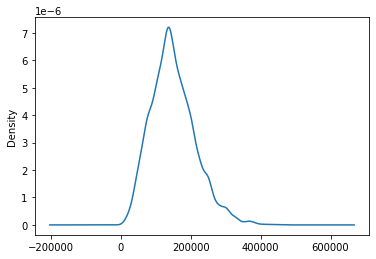

In [26]:
df['salary_in_usd'].plot(kind = 'kde')

In [27]:
df['salary_in_usd'].skew()

0.6212912531604922

In [28]:
#A skewness of 0.6 is moderate. It suggest that there is some degree of skewness, but it is not extreme or highly pronounced.


# In a right-skewed distribution, the mean is typically greater than the median. Therefore, 
# you might observe that the mean of the data is pulled towards the higher values compared to the median.

# Also, Positive skewness indicates presence of outliers on right side of the distribution


In [29]:
#We can check whether salaries follow normal distribution or not using something called Q-Q plot

In [30]:
import pylab
import scipy.stats as stats

In [31]:
salary = df['salary_in_usd']

((array([-3.7940965 , -3.56802174, -3.44386228, ...,  3.44386228,
          3.56802174,  3.7940965 ]),
  array([ 15000,  15000,  15000, ..., 430640, 430967, 450000], dtype=int64)),
 (62493.96881113138, 150299.49556386957, 0.988859816675834))

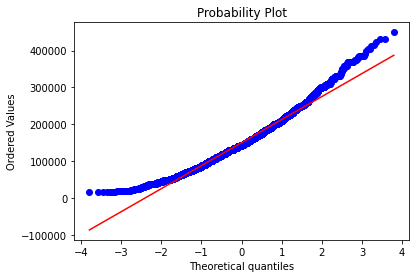

In [32]:
stats.probplot(salary , dist = 'norm' , plot = pylab)

In [33]:
#We can clearly See that Salaries of people does not follow normal disstribution

In [34]:
# Observation

# Identifiyng outliers

# It is important to determine whether the outliers are due to measurement errors, data entry errors,
# legitimate(legal or meaningful) differences in data and to decide whether to include or exclude them from analysis

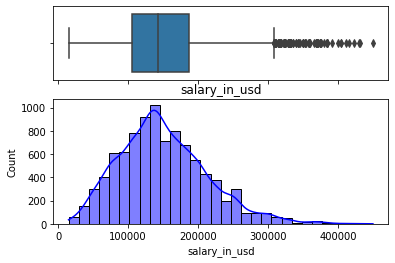

In [35]:
#This function is copied from open source contribution

def plot_boxplot_hist(data, variable):
    f, (ax_box , ax_hist) = plt.subplots(
        2, sharex = True, gridspec_kw = {'height_ratios' : (0.50 , 0.85)}
    )

    sns.boxplot(x = data[variable] , ax = ax_box)
    sns.histplot(data = data , x = variable , ax= ax_hist,kde = True,color = 'blue' , bins = 30)
    ax_box.set(xlabel = '')
    plt.title(variable)
    plt.show()
    
plot_boxplot_hist(df,'salary_in_usd')

<AxesSubplot:>

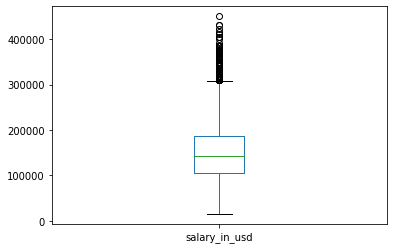

In [36]:
df['salary_in_usd'].plot(kind = 'box')

In [37]:
#Observation

# 1.By definition of boxplots, The points beyond the whiskers are often called as outliers.
# 2.By looking to the plot, we can say there might be outliers in our dataset but we are not sure on it
#  as people can have high salaries if they are skilled and having good education background and good experience

In [38]:
#Now we will try to find outliers using IQR (Inter quantile range)

def find_limits(df , variable , fold):
    IQR = (df[variable].quantile(0.75) - df[variable].quantile(0.25))
    
    lower_limit = df[variable].quantile(0.25) - (IQR * fold)
    upper_limit = df[variable].quantile(0.75) + (IQR * fold)

    return lower_limit , upper_limit

In [39]:
find_limits(df,'salary_in_usd' , 1.5)

(-15834.5, 308257.5)

In [40]:
#So according to IQR people having salaries greater than 308k can be considerd as outliers
# we can also try with fole value of 3

In [41]:
find_limits(df,'salary_in_usd' , 3)

(-137369.0, 429792.0)

In [42]:
#If we try fold value of 3 than it says people having salaries higher than 429k are the outliers
#Lets validate both the observations

In [43]:
filt = df['salary_in_usd'] > 429792.0

df.loc[filt]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
5702,2023,Analytics Engineer,Leadership and Management,GBP,350000,430640,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
7683,2022,Data Analyst,Data Analysis,GBP,350000,430967,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
9157,2020,Research Scientist,Data Science and Research,USD,450000,450000,United States,Mid-level,Full-time,In-person,United States,M


In [44]:
#We can say that this may be the outliers because It is diffficlut that a data analyst with Moderate of experience and 
# in Medium sized company having salary of 430K


<AxesSubplot:xlabel='salary_in_usd', ylabel='Proportion'>

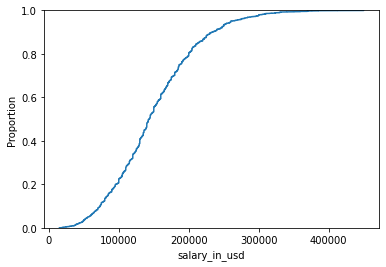

In [45]:
sns.ecdfplot(df['salary_in_usd'])

In [46]:
#Observation

# 1.By looking to PDF we can say distribution is almost Normal with skewness of 0.6
# 2.By  looking at CDF we can say more than 80% of people having salaries less than 300k, And 20% of people having 
#   salaries more than 300K so we will not assume this as outliers because it can be legitimate points.


In [47]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


<AxesSubplot:>

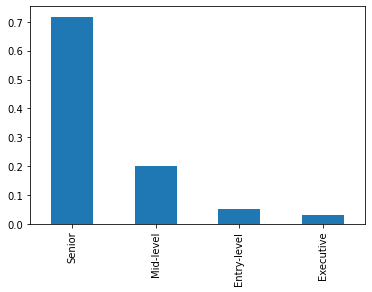

In [48]:
df['experience_level'].value_counts(normalize = True).plot(kind = 'bar')

In [49]:
#Obervation
# 1.More than 70% of people having 'Senior' experience level 

In [50]:
df['employment_type'].value_counts(normalize = True) * 100

Full-time    99.518974
Contract      0.203100
Part-time     0.160342
Freelance     0.117584
Name: employment_type, dtype: float64

In [51]:
#Obervations
# 1.We are having 4 different employment types
# 2.99.5% of people falls under Full-time category

In [52]:
df['work_setting'].value_counts(normalize = True) * 100

In-person    61.250668
Remote       36.707643
Hybrid        2.041689
Name: work_setting, dtype: float64

In [53]:
df['company_size'].value_counts(normalize = True)* 100

M    90.304650
L     7.995724
S     1.699626
Name: company_size, dtype: float64

In [54]:
#Observations
# 1.In our dataset 90% of companies are medium scale companies

In [55]:
#Bi-variate analysis

In [56]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

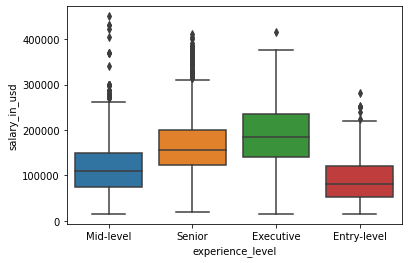

In [57]:
sns.boxplot(x = 'experience_level' , y = 'salary_in_usd' , data = df)

In [58]:
#Observation

# 1.It seems that there are outliers in Mid-level category. So we will be removing it
# 2.We can expect that people having senior level of experience can have that much salary, so we will not remove them

In [59]:
filt = ( (df['experience_level'] == 'Mid-level') & (df['salary_in_usd'] > 400000))
df.loc[filt]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
1696,2023,Research Scientist,Data Science and Research,USD,405000,405000,United States,Mid-level,Full-time,In-person,United States,L
5702,2023,Analytics Engineer,Leadership and Management,GBP,350000,430640,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
7683,2022,Data Analyst,Data Analysis,GBP,350000,430967,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
9157,2020,Research Scientist,Data Science and Research,USD,450000,450000,United States,Mid-level,Full-time,In-person,United States,M
9348,2021,Applied Machine Learning Scientist,Machine Learning and AI,USD,423000,423000,United States,Mid-level,Full-time,Hybrid,United States,L


In [60]:
df.drop(df[filt].index,inplace = True)

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

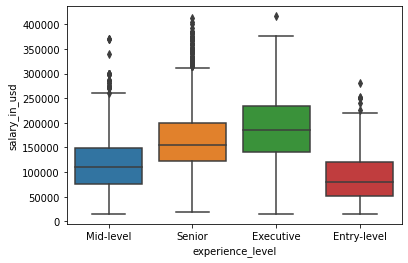

In [61]:
sns.boxplot(x = 'experience_level' , y = 'salary_in_usd' , data = df)

In [62]:
filt = ( (df['experience_level'] == 'Senior') & (df['salary_in_usd'] > 350000))
df.loc[filt]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
810,2023,Research Scientist,Data Science and Research,USD,370000,370000,United States,Senior,Full-time,In-person,United States,M
888,2023,Data Architect,Data Architecture and Modeling,USD,354200,354200,United States,Senior,Full-time,Remote,United States,M
1031,2023,AI Engineer,Machine Learning and AI,USD,372000,372000,United States,Senior,Full-time,In-person,United States,M
1229,2023,Research Engineer,Data Science and Research,USD,370000,370000,United States,Senior,Full-time,In-person,United States,M
1862,2023,Data Engineer,Data Engineering,USD,385000,385000,United States,Senior,Full-time,In-person,United States,M
1906,2023,Research Engineer,Data Science and Research,USD,385000,385000,United States,Senior,Full-time,In-person,United States,M
1912,2023,Data Engineer,Data Engineering,USD,385000,385000,United States,Senior,Full-time,In-person,United States,M
1960,2023,AI Engineer,Machine Learning and AI,USD,360000,360000,United States,Senior,Full-time,In-person,United States,M
2211,2023,Machine Learning Engineer,Machine Learning and AI,USD,370000,370000,United States,Senior,Full-time,In-person,United States,M
2492,2023,Data Infrastructure Engineer,Data Engineering,USD,385000,385000,United States,Senior,Full-time,In-person,United States,M


In [63]:
filt = ( (df['experience_level'] == 'Executive') & (df['salary_in_usd'] > 400000))
df.loc[filt]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9287,2021,Principal Data Scientist,Data Science and Research,USD,416000,416000,United States,Executive,Contract,Remote,United States,S


In [64]:
#It seems that these are legitimate data values so we will not remove it.

In [65]:
## 1.Can create new column salary_categoies
# people having more than 300k salary - High income

In [66]:
def sal_categories(num):
        if num >= 370000:
            return 'High'
        elif 150000 < num < 370000:
            return 'Moderate'
        else:
            return 'Low'

In [67]:
df['Salary_categories'] = df['salary_in_usd'].apply(sal_categories)

In [68]:
df['Salary_categories'].value_counts()

Low         5205
Moderate    4114
High          31
Name: Salary_categories, dtype: int64

In [69]:
#Ok so we will se people jobs of people having high salaries

In [70]:
temp = df[df['Salary_categories'] == 'High']

In [71]:
temp.groupby('job_category')['salary_in_usd'].agg(['mean','min' , 'max'])

,mean,min,max
job_category,,,
Data Analysis,385000.000000,385000,385000
Data Architecture and Modeling,376080.000000,376080,376080
Data Engineering,381250.000000,370000,385000
Data Science and Research,377500.000000,370000,416000
Leadership and Management,402440.000000,399880,405000
Machine Learning and AI,379651.666667,370000,392000


In [72]:
filt = ( (temp['job_category'] == 'Data Science and Research') | (temp['job_category'] == 'Machine Learning and AI'))

temp.loc[filt]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,Salary_categories
810,2023,Research Scientist,Data Science and Research,USD,370000,370000,United States,Senior,Full-time,In-person,United States,M,High
1031,2023,AI Engineer,Machine Learning and AI,USD,372000,372000,United States,Senior,Full-time,In-person,United States,M,High
1229,2023,Research Engineer,Data Science and Research,USD,370000,370000,United States,Senior,Full-time,In-person,United States,M,High
1906,2023,Research Engineer,Data Science and Research,USD,385000,385000,United States,Senior,Full-time,In-person,United States,M,High
2211,2023,Machine Learning Engineer,Machine Learning and AI,USD,370000,370000,United States,Senior,Full-time,In-person,United States,M,High
2622,2023,Director of Data Science,Data Science and Research,USD,375500,375500,United States,Executive,Full-time,Remote,United States,M,High
2710,2023,ML Engineer,Machine Learning and AI,USD,385000,385000,United States,Senior,Full-time,Remote,United States,M,High
3080,2023,Data Scientist,Data Science and Research,USD,370000,370000,United States,Senior,Full-time,In-person,United States,M,High
4100,2023,ML Engineer,Machine Learning and AI,USD,383910,383910,United States,Senior,Full-time,In-person,United States,M,High
4267,2023,Machine Learning Engineer,Machine Learning and AI,USD,392000,392000,United States,Senior,Full-time,In-person,United States,M,High


In [73]:
#Observations

# 1.By analysing salaries of Temp dataframe we can say
# People having job role of 0

# Data scientist
# Applied Data scientist
# Research engineer
# research scientist
# Machine learning enginner

# These guys are making alot of money

In [74]:
pd.crosstab(df['Salary_categories'] , df['company_size'], normalize = 'columns') * 100

company_size,L,M,S
Salary_categories,,,
High,0.670241,0.296033,0.628931
Low,61.796247,54.541149,86.792453
Moderate,37.533512,45.162818,12.578616


In [75]:
#Observation

# 1.We can see probabilities of people having high salaries i.e more than 370k in all size of companies
# is not more than 1%.

<AxesSubplot:xlabel='experience_level'>

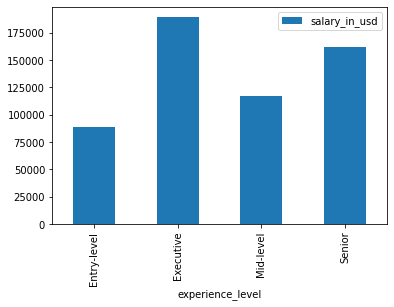

In [76]:
df.groupby('experience_level')[['salary_in_usd']].mean().plot(kind = 'bar')

In [77]:
#Remember in beginning we found that majority of people are in these 4 job categories

In [78]:
# Data Science and Research       
# Data Engineering                  
# Data Analysis                     
# Machine Learning and AI

In [79]:
filt = (df['job_category'] == 'Data Science and Research') | (df['job_category'] == 'Data Engineering') | (df['job_category'] == 'Data Analysis ')| (df['job_category'] == 'Machine Learning and AI')

In [80]:
temp = df.loc[filt]

In [81]:
temp.groupby('job_category')[['salary_in_usd']].agg(('mean' ,'sum','median'))

salary_in_usd                   
                                    mean        sum  median
job_category                                               
Data Engineering           146197.656195  330406703  139930
Data Science and Research  163583.448871  492713348  159100
Machine Learning and AI    178754.807288  255083110  176000

<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

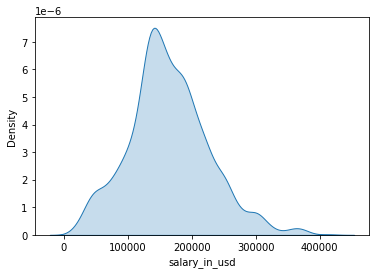

In [82]:
filt = df[df['job_category']== 'Data Science and Research']['salary_in_usd']
sns.kdeplot(filt , fill = True)

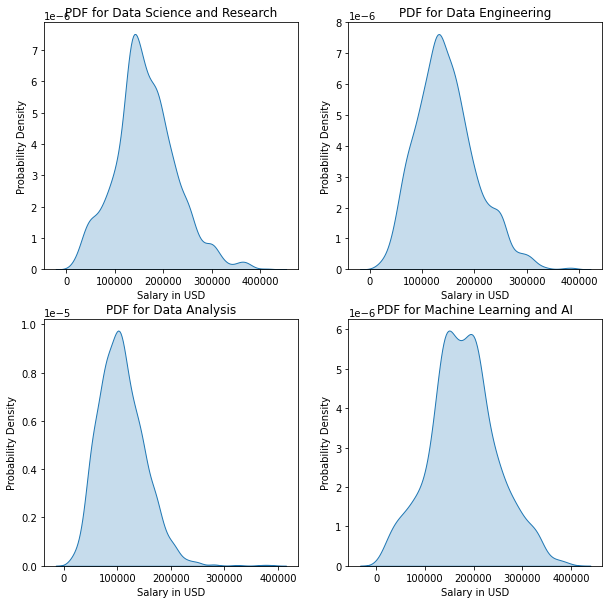

In [83]:
conditions = ['Data Science and Research' , 'Data Engineering' , 'Data Analysis' , 'Machine Learning and AI']


fig , axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i,condition in enumerate(conditions):
    filt = df[df['job_category'] == condition]['salary_in_usd']
    sns.kdeplot(filt ,fill = True ,ax = axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'PDF for {condition}')
    axes[i // 2, i % 2].set_xlabel('Salary in USD')
    axes[i // 2, i % 2].set_ylabel('Probability Density')

plt.show()

In [84]:
conditions = ['Data Science and Research' , 'Data Engineering' , 'Data Analysis' , 'Machine Learning and AI']

for condition in conditions:
    filt = df[df['job_category'] == condition]['salary_in_usd']
    print(f'{condition}')
    print(filt.describe())
    print('-----------------------------------------------')

Data Science and Research
count      3012.000000
mean     163583.448871
std       62959.976570
min       16000.000000
25%      127280.250000
50%      159100.000000
75%      200000.000000
max      416000.000000
Name: salary_in_usd, dtype: float64
-----------------------------------------------
Data Engineering
count      2260.000000
mean     146197.656195
std       57116.210669
min       18000.000000
25%      106500.000000
50%      139930.000000
75%      180000.000000
max      385000.000000
Name: salary_in_usd, dtype: float64
-----------------------------------------------
Data Analysis
count      1456.000000
mean     108284.250687
std       43065.714373
min       15000.000000
25%       78000.000000
50%      105000.000000
75%      135000.000000
max      385000.000000
Name: salary_in_usd, dtype: float64
-----------------------------------------------
Machine Learning and AI
count      1427.000000
mean     178754.807288
std       68468.286300
min       15000.000000
25%      139500.000000


In [85]:
#Now compare the same with that now these people are getting these salaries but with what experience level
# and which sized companies

In [86]:
# conditions = ['Data Science and Research' , 'Data Engineering' , 'Data Analysis' , 'Machine Learning and AI']

filt = df[df['job_category'] == 'Data Science and Research']
filt.groupby('experience_level')[['salary_in_usd']].agg(['mean','median' ,'min','max'])

salary_in_usd                       
                           mean  median    min     max
experience_level                                      
Entry-level       100975.951220  100000  16000  281700
Executive         206460.246914  200000  69741  416000
Mid-level         127966.597586  125000  20000  340000
Senior            174374.719383  168000  20171  412000

In [87]:
filt = df[df['job_category'] == 'Machine Learning and AI']
filt.groupby('experience_level')[['salary_in_usd']].agg(['mean','median','min','max'])

salary_in_usd                          
                           mean    median     min     max
experience_level                                         
Entry-level        89076.390625   75043.5   15000  250000
Executive         206510.461538  200000.0  145000  330000
Mid-level         140743.504274  134000.0   22800  369120
Senior            191544.448925  188900.0   18907  392000

In [88]:
filt = df[df['job_category'] == 'Data Engineering']
filt.groupby('experience_level')[['salary_in_usd']].agg(['mean','median','min','max'])

salary_in_usd                       
                           mean  median    min     max
experience_level                                      
Entry-level        96347.663158   85000  18000  220000
Executive         187123.273585  186100  71908  333500
Mid-level         115030.658385  109000  18000  275000
Senior            156001.776650  150000  25000  385000

In [89]:
#Final conclusion

First we have started with Unnivariate analysis

1.We are haveing data for almost 4 years out of which 80% of data is from year 2023 and 17% from year 2022

2.# Majority of people having job title and category under 'Data Engineer' 'Data Scientist' 'Data Analyst' 
'Machine Learning Engineer' 

3.Around 92% of people having salary in usd and we dont have mising values in usd, so we have conssidered
salary_in_usd column for our reference.

4.Initially we have thought that salaried follow normal distribution, but when we have used skewness and q-q plot
we got to know that it doesnt follow normal distribution

5.we have used IQR function to find outliers by setting fold value 1.5 and 3 

6.90% of people work in medium sized companies

Bi-variate analysis

1.By visualizing the boxplot we have noticed that there are obvious outliers for people having Mid-level of experience.
So we have removed it using trimming technique.

2.We have created new column called salary category having 3 values 'High' 'Moderate' 'Low'.
People having salary more than 370k are considered under 'High' category.

3.We have done analysis on people having 'High' salaries, And found that most of them having following job role
# Data scientist
# Applied Data scientist
# Research engineer
# research scientist
# Machine learning enginner

# These guys are making alot of money

4.But we have also noticed that probabilities of people having high salaries i.e more than 370k in all size of companies
# is not more than 1%.

5.Analysing the 4 major categories 'Data Science and Research' , 'Data Engineering' , 'Data Analysis' , 
'Machine Learning and AI'

Median salaries

'Data Science and Research' - 159k
'Data Engineering' - 139k
'Data Analysis' - 105k
'Machine Learning and AI' - 176k









SyntaxError: invalid syntax (<ipython-input-89-ef37e81616e3>, line 3)